In [14]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# !pip install metric_learn
from metric_learn import LMNN,NCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [3]:
data = pd.read_csv('/content/drive/MyDrive/wine.csv')
data.head()

,Class,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
class KNN:
  def __init__(self, k = 5, metric = 'euclidean'):
    self.k = k
    self.metric = metric
  
  def fit(self, x_train, y_train):
    self.x_train = np.array(x_train)
    self.y_train = np.array(y_train)
  
  def predict(self, x_test):

    assert (self.metric == 'euclidean' or self.metric == 'nca' or self.metric =='lmnn'), "metric not implented"
    y_pred = np.zeros(len(x_test))

    if(self.metric == 'lmnn'):
      metric_cal = LMNN(k = self.k)
      self.x_train =  metric_cal.fit_transform(self.x_train, self.y_train)
    elif(self.metric == 'nca'):
      metric_cal = NCA(max_iter = 400)
      self.x_train =  metric_cal.fit_transform(self.x_train, self.y_train)

    for i in range(len(x_test)):
      similiarity_vec = np.zeros(len(self.x_train))
      for j in range(len(self.x_train)):
        similiarity_vec[j] = norm(x_test.iloc[i,:] - self.x_train[j,:])
      idx = np.argpartition(similiarity_vec, self.k)
      y_pred[i] = np.bincount(y_train.iloc[idx[:self.k]]).argmax()

    return y_pred

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:14], data.iloc[:,0], test_size=0.2, random_state = 0)
model = KNN(metric= 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[13  0  1]
 [ 0 14  2]
 [ 2  2  2]]
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.88      0.88      0.88        16
           3       0.40      0.33      0.36         6

    accuracy                           0.81        36
   macro avg       0.71      0.71      0.71        36
weighted avg       0.79      0.81      0.80        36

0.8055555555555556


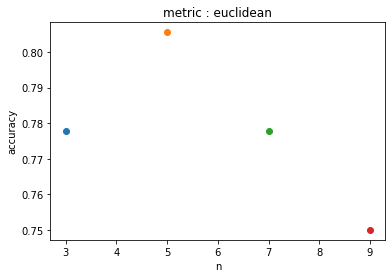

In [7]:
n_neighbors = [3, 5, 7, 9]
accs = np.zeros(len(n_neighbors))
for i,n in enumerate(n_neighbors):
  model = KNN(k=n,metric = 'euclidean')
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accs[i] = accuracy_score(y_test, y_pred)

for i in range(len(n_neighbors)):
  plt.scatter(n_neighbors[i], accs[i])
plt.title('metric : euclidean')
plt.ylabel('accuracy')
plt.xlabel('n')
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:14], data.iloc[:,0], test_size=0.2, random_state = 0)
model = KNN(metric= 'lmnn')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[13  1  0]
 [ 0 16  0]
 [ 0  2  4]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.84      1.00      0.91        16
           3       1.00      0.67      0.80         6

    accuracy                           0.92        36
   macro avg       0.95      0.87      0.89        36
weighted avg       0.93      0.92      0.91        36

0.9166666666666666


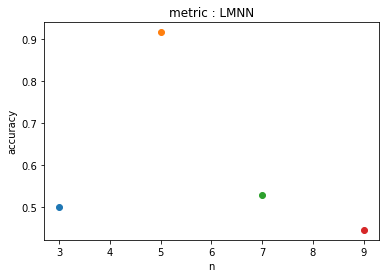

In [9]:
n_neighbors = [3, 5, 7, 9]
accs = np.zeros(len(n_neighbors))
for i,n in enumerate(n_neighbors):
  model = KNN(k=n,metric = 'lmnn')
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accs[i] = accuracy_score(y_test, y_pred)

for i in range(len(n_neighbors)):
  plt.scatter(n_neighbors[i], accs[i])
plt.title('metric : LMNN')
plt.ylabel('accuracy')
plt.xlabel('n')
plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:14], data.iloc[:,0], test_size=0.2, random_state = 0)
model = KNN(metric= 'nca')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[13  1  0]
 [ 0 16  0]
 [ 0  6  0]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.70      1.00      0.82        16
           3       0.00      0.00      0.00         6

    accuracy                           0.81        36
   macro avg       0.57      0.64      0.59        36
weighted avg       0.70      0.81      0.74        36

0.8055555555555556


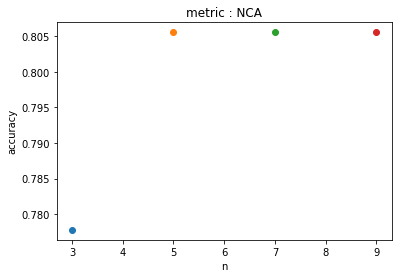

In [16]:
n_neighbors = [3, 5, 7, 9]
accs = np.zeros(len(n_neighbors))
for i,n in enumerate(n_neighbors):
  model = KNN(k=n,metric = 'nca')
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accs[i] = accuracy_score(y_test, y_pred)

for i in range(len(n_neighbors)):
  plt.scatter(n_neighbors[i], accs[i])
plt.title('metric : NCA')
plt.ylabel('accuracy')
plt.xlabel('n')
plt.show()